#Paquetes necesarios

In [186]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt
import math

Carga imagen y convierte a RGB

(938, 473, 3)


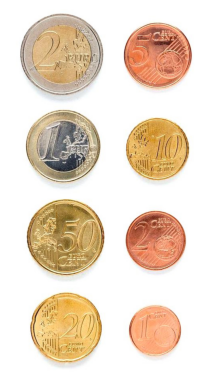

In [187]:
img = cv2.imread('Monedas.jpg') 
print(img.shape)
#OpenCV lee las imágenes en BGR, por lo que convertimos para visualizr RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.axis("off")
plt.imshow(img_rgb) 
plt.show()

Convierte a gris y muestra histograma

(0.0, 256.0)

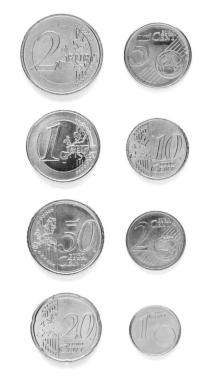

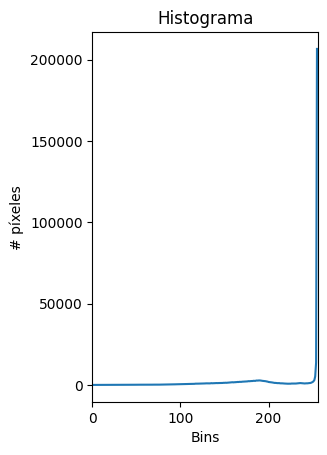

In [188]:
#Convierte a gris y muestra
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Cálculo del histograma de una imagen en escala de grises
hist = cv2.calcHist([img_gris], [0], None, [256], [0, 256])

plt.figure()
plt.axis("off")
plt.imshow(img_gris, cmap='gray')

# Histograma sin normalizar
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Histograma")
plt.xlabel("Bins")
plt.ylabel("# píxeles")
plt.plot(hist)
plt.xlim([0, 256])

Cuenta elementos tras umbralizar

Text(0.5, 1.0, 'OTSU invertida')

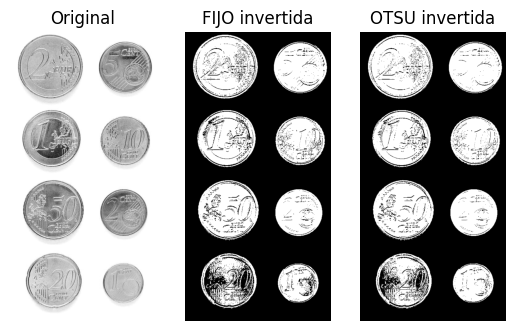

In [189]:
#Dos umbralizados. Te invito a probar con parámetros, aplicar filtro previo, etc.
umbral = 200
#Umbralización binaria invertida, objetos en blanco
res,img_th1 = cv2.threshold(img_gris,umbral,255,cv2.THRESH_BINARY_INV)
# Otsu
ret2,img_th2 = cv2.threshold(img_gris,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.subplot(1, 3, 1)
plt.axis("off")
plt.imshow(img_gris,cmap='gray') 
plt.title('Original')

plt.subplot(1, 3, 2)
plt.axis("off")
plt.imshow(img_th1,cmap='gray') 
plt.title('FIJO invertida')

plt.subplot(1, 3, 3)
plt.axis("off")
plt.imshow(img_th2,cmap='gray') 
plt.title('OTSU invertida')



Búsqueda de componentes y sus contornos

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


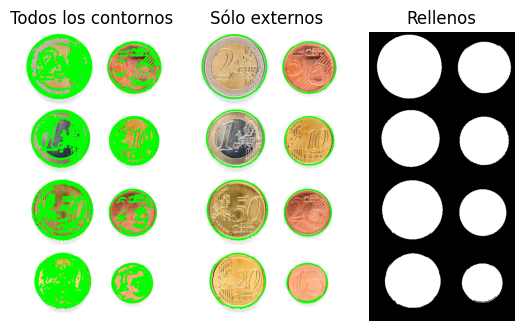

In [190]:
#Localiza contornos en imagen obtenida con umbral fijo
#findContours está diseñada para imágenes con la figura en blanco y el fondo negro
#La imagen de entrada debe ser de un canal y 8 bits eccepto en los modos RETR_CCOMP o RETR_FLOODFILL
#hierarchy contiene información sobre el nivel del contorno, relaciones paterno-filiales

#Todos los contornos, externos e internos
contornos, hierarchy = cv2.findContours(
    img_th1, #imagen
    cv2.RETR_TREE, #Modo de recuperación (lista, árbol, nivel superior)
    cv2.CHAIN_APPROX_SIMPLE #Método de aproximación del contorno
    )
#Sólo contornos externos
contornos2, hierarchy2 = cv2.findContours(img_th1, 
    cv2.RETR_EXTERNAL , 
    cv2.CHAIN_APPROX_SIMPLE)

# Dibuja sobre la imagen de entrada todos los contornos en verde
#Cada vez que quiere pintar convierte img para no tener restos
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornos, -1, (0,255,0), 3)

plt.subplot(131)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Todos los contornos')

# Dibuja sobre la imagen de entrada sólo contornos externos
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornos2, -1, (0,255,0), 3)

plt.subplot(132)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Sólo externos')

#Dibuja contornos externos en imagen vacía
#Muestra información
#Imagen vacía
img_cont = np.zeros(img_rgb.shape)
for c in contornos2:
    #Área
    area = cv2.contourArea(c)

    #Dimensión mínima (útil en ocasiones)
    if area > 10:
        #Perímetro
        perimetro = cv2.arcLength(c,True)
        #Contenedor alineado con ejes de la imagen
        x,y,w,h = cv2.boundingRect(c)
        #Mínimo contenedor ajustado para el contorno
        rect = cv2.minAreaRect(c)
        #Mínimo círculo que lo contiene
        (cx,cy),radio = cv2.minEnclosingCircle(c)
        #Elipse ajustada
        if c.shape[0] > 5:
            elipse = cv2.fitEllipse(c)
            #Para determinadas tareas nos interesará mostrar estos valores
            #print(area, perimetro, rect, cx,cy,radio, elipse)

        #Dibuja los contornos
        cv2.drawContours(img_cont, [c], -1, (255,255,255), -1)

plt.subplot(133)
plt.axis("off")
plt.imshow(img_cont) 
plt.title('Rellenos')
plt.show()


TAREA: Captura una o varias imágenes con monedas no solapadas y algún objeto que no lo sea. Filtra los contornos que no se correpondan con monedas, y muestra el número total de monedas.

Para esta tarea, se emplean los conocimientos ya adquiridos en este cuaderno. En primer lugar, con el fin de encontrar un buen valor de umbralizado, se calcula el histograma así como se muestra su resultado al aplicar umbralización binaria invertida y OTSU. A continuación, se trata de filtrar aquellos objetos que no sean monedas, aplicando la información encontrada en: https://gis.stackexchange.com/questions/88685/how-to-determine-if-an-object-is-a-circle

In [191]:
def applyThreshold(img_rgb, umbral, option):

    plt.axis("off")
    plt.imshow(img_rgb) 
    plt.show()

    #Convierte a gris
    self_img_gris = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

    #Cálculo del histograma de una imagen en escala de grises
    hist = cv2.calcHist([self_img_gris], [0], None, [256], [0, 256])

    # Histograma sin normalizar
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.title("Histograma")
    plt.xlabel("Bins")
    plt.ylabel("# píxeles")
    plt.plot(hist)
    plt.xlim([0, 256])

    if option == 1:
        #Umbralización binaria invertida, objetos en blanco
        res,img_th = cv2.threshold(self_img_gris,umbral,255,cv2.THRESH_BINARY_INV)
      
    else:
        #Otsu
        res,img_th = cv2.threshold(self_img_gris,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    plt.figure()
    plt.subplot(1, 3, 1)
    plt.axis("off")
    plt.imshow(self_img_gris,cmap='gray') 
    plt.title('Original')

    plt.subplot(1, 3, 2)
    plt.axis("off")
    plt.imshow(img_th1,cmap='gray') 
    plt.title('FIJO invertida')

    plt.subplot(1, 3, 3)
    plt.axis("off")
    plt.imshow(img_th2,cmap='gray') 
    plt.title('OTSU invertida')

    return img_th

In [192]:
def findCircles(img_otsu, self_img_rgb):

    self_img_rgb_copy_1 = self_img_rgb.copy()
    self_img_rgb_copy_2 = self_img_rgb.copy()

    #Sólo contornos externos
    contornos2, hierarchy2 = cv2.findContours(img_otsu, 
        cv2.RETR_EXTERNAL , 
        cv2.CHAIN_APPROX_SIMPLE)

    # Dibuja sobre la imagen de entrada sólo contornos externos
    cv2.drawContours(self_img_rgb_copy_1, contornos2, -1, (0,255,0), 3)
    plt.subplot(132)
    plt.axis("off")
    plt.imshow(self_img_rgb_copy_1) 
    plt.title('Sólo externos')

    coin_count = 0
    for c in contornos2:
        #Área
        area = cv2.contourArea(c)

        if area > 10:
            #Perímetro
            perimetro = cv2.arcLength(c,True)
            if area > 0 and perimetro > 0:
                thinness_ratio = (4*math.pi*area)/(perimetro*perimetro)
                if 0.685 <= thinness_ratio <= 1:
                    #Dibuja los contornos
                    cv2.drawContours(self_img_rgb_copy_2, [c], -1, (0,255,0), 3)
                    coin_count += 1


    plt.subplot(133)
    plt.axis("off")
    plt.imshow(self_img_rgb_copy_2) 
    plt.title('Total de monedas: ' + str(coin_count))
    plt.show()

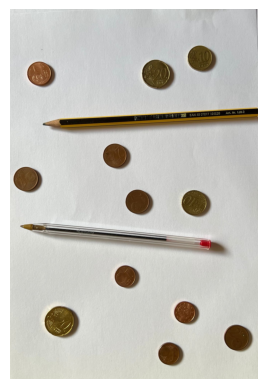

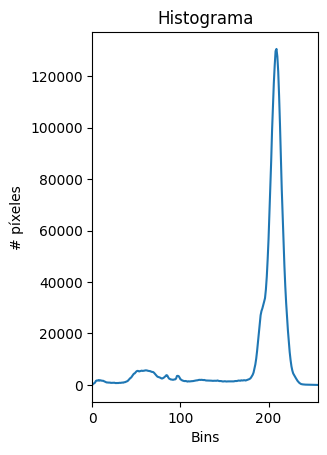

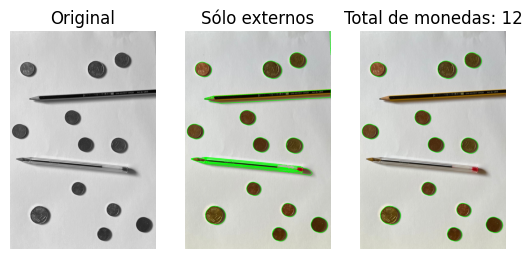

In [193]:
self_img = cv2.imread('prueba_foto2.jpg')

#OpenCV lee las imágenes en BGR, por lo que convertimos para visualizar RGB
self_img_rgb = cv2.cvtColor(self_img, cv2.COLOR_BGR2RGB)
self_img_rgb_copy = self_img_rgb.copy() 

img_thd = applyThreshold(self_img_rgb, 175, 2)
findCircles(img_thd, self_img_rgb_copy)

Una alternativa consiste en contar círculos utilizando la Transformada de Hough. La selección de parámetros puede ser "divertida", más [información](https://docs.opencv.org/4.x/da/d53/tutorial_py_houghcircles.html)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


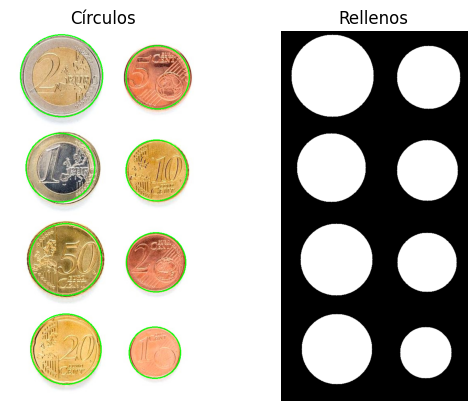

In [194]:
#Conversión a gris
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Suaviza altas frecuencias
pimg = cv2.medianBlur(gris, 7)
#Localiza Círculos
circ = cv2.HoughCircles(
        pimg,  # imagen 
        cv2.HOUGH_GRADIENT,  # tipo de detección
        1,
        100,  # distancia mínima entre círculos
        param1=100, # Valor del gradiente
        param2=50, #Umbral acumulador
        minRadius=50,  # radio mínimo
        maxRadius=150,  # radio máximo
    )

#Dibuja sobre entrada  e imagen vacía
img_cont = np.zeros(img_rgb.shape)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for det in circ[0]:
        x_coor, y_coor, det_radio = det
        cv2.circle(img_rgb,(int(x_coor), int(y_coor)),
            int(det_radio),(0, 255, 0), 2)
        cv2.circle(img_cont,(int(x_coor), int(y_coor)),
            int(det_radio),(255, 255, 255), -1)

#Muestra resultado
plt.subplot(121)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Círculos')

plt.subplot(122)
plt.axis("off")
plt.imshow(img_cont) 
plt.title('Rellenos')

plt.show()

TAREA: Captura una o varias imágenes con monedas no solapadas, y otras con monedas solapadas. Identificada una moneda de un euro en la imagen, por ejemplo con un clic de ratón, calcular la cantidad de dinero presente en la imagen.




In [195]:
# of the points clicked on the image
def click_event(event, x, y, flags, params):
 
    # checking for left mouse clicks
    if event == cv2.EVENT_LBUTTONDOWN:
 
        # displaying the coordinates
        # on the Shell
        print(x, ' ', y)
        # displaying the coordinates
        # on the image window
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, str(x) + ',' +
                    str(y), (x,y), font,
                    0.7, (255, 0, 0), 2)
        cv2.imshow('image', img)



In [203]:
def get_draw_contours(image):

    gris = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    #Suaviza altas frecuencias
    pimg = cv2.medianBlur(gris, 7)

    #Localiza Círculos
    circ = cv2.HoughCircles(
            pimg,  # imagen 
            cv2.HOUGH_GRADIENT,  # tipo de detección
            1,
            100,  # distancia mínima entre círculos
            param1=100, # Valor del gradiente
            param2=50, #Umbral acumulador
            minRadius=50,  # radio mínimo
            maxRadius=150,  # radio máximo
        )

    #Dibuja sobre entrada  e imagen vacía
    img_cont = np.zeros(image.shape)
    for det in circ[0]:
        x_coor, y_coor, det_radio = det
        cv2.circle(image,(int(x_coor), int(y_coor)),
            int(det_radio),(0, 255, 0), 3)
        cv2.circle(img_cont,(int(x_coor), int(y_coor)),
            int(det_radio),(255, 255, 255), -1)

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    #Muestra resultado
    plt.subplot(121)
    plt.axis("off")
    plt.imshow(image_rgb) 
    plt.title('Círculos')

    plt.subplot(122)
    plt.axis("off")
    plt.imshow(img_cont) 
    plt.title('Rellenos')

    plt.show()

    return image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


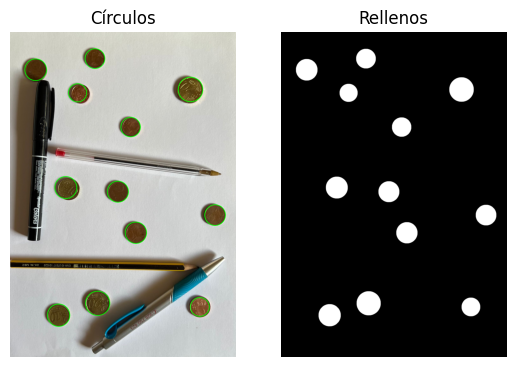

In [205]:
# Main code

# Reading image
self_img = cv2.imread('prueba_foto1.jpg')

# Get and draw coin contours
img = get_draw_contours(self_img.copy())

scale_percent = 29.296875
img = cv2.resize(img, (int(img.shape[1] * scale_percent / 100), int(img.shape[0] * scale_percent / 100)), interpolation = cv2.INTER_AREA)

# displaying the image
cv2.imshow('image', img)

# setting mouse handler for the image
# and calling the click_event() function
cv2.setMouseCallback('image', click_event)
# wait for a key to be pressed to exit
while cv2.waitKey(20) != 27:
    continue

# close the window
cv2.destroyAllWindows()

Microplásticos

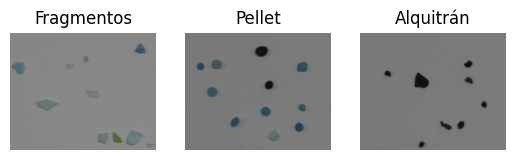

In [198]:
#Cargamos tres subimágenes de cada uno de los tres tipos considerados (el alquitrán efectivamenet no es microplástico)
imgF = cv2.imread('FRA.png') 
imgP = cv2.imread('PEL.png') 
imgT = cv2.imread('TAR.png') 

#Mostramos
plt.subplot(131)
plt.axis("off")
plt.imshow(imgF) 
plt.title('Fragmentos')
plt.subplot(132)
plt.axis("off")
plt.imshow(imgP) 
plt.title('Pellet')
plt.subplot(133)
plt.axis("off")
plt.imshow(imgT) 
plt.title('Alquitrán')
plt.show()

TAREA: Estas tres imágenes han sido extraidas de las imágenes de mayor tamaño contenidas en la carpeta. Determina patrones geométricos para cada una de las tres clases y evalúa con las imágenes completas la matriz de confusión.

El el trabajo [SMACC: A System for Microplastics Automatic Counting and Classification](https://doi.org/10.1109/ACCESS.2020.2970498), las características geométricas utilizadas en dicho trabajo fueron:

- Área en píxeles
- Perímetro en píxele
- Compacidad (relación del cuadrado del perímetro con el área)
- Relación del área con la del contenedor
- Relación del ancho y el alto del contenedor
- Relación entre los ejes de la elipse ajustada
- Definido el centroide, relación entre las distancias menor y mayor al contorno